# EN to MS

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [Malaya/example/en-ms-translation](https://github.com/huseinzol05/Malaya/tree/master/example/en-ms-translation).
    
</div>

<div class="alert alert-warning">

This module only trained on standard language structure, so it is not save to use it for local language structure.
    
</div>

In [ ]:
%%time
import malaya

### List available Transformer models

In [ ]:
malaya.translation.en_ms.available_transformer()

We tested on 77k EN-MS sentences.

### Load Transformer models

```python
def transformer(model: str = 'base', quantized: bool = False, **kwargs):
    """
    Load Transformer encoder-decoder model to translate EN-to-MS.

    Parameters
    ----------
    model : str, optional (default='base')
        Model architecture supported. Allowed values:

        * ``'small'`` - Transformer SMALL parameters.
        * ``'base'`` - Transformer BASE parameters.
        * ``'large'`` - Transformer LARGE parameters.
        * ``'bigbird'`` - BigBird BASE parameters.
        * ``'small-bigbird'`` - BigBird SMALL parameters.
    
    quantized : bool, optional (default=False)
        if True, will load 8-bit quantized model. 
        Quantized model not necessary faster, totally depends on the machine.

    Returns
    -------
    result: model
        if `bigbird` in model, return malaya.model.bigbird.Translation
        else, return malaya.model.tf.Translation
    """
```

In [3]:
transformer = malaya.translation.en_ms.transformer()
transformer_small = malaya.translation.en_ms.transformer(model = 'small')
transformer_large = malaya.translation.en_ms.transformer(model = 'large')

downloading frozen model to /Users/huseinzolkepli/Malaya/translation-en-ms/base/model.pb


223MB [01:54, 1.94MB/s]                          


downloading frozen vocab to /Users/huseinzolkepli/Malaya/bpe/en-ms.subwords


1.00MB [00:00, 1.74MB/s]                   

downloading frozen model to /Users/huseinzolkepli/Malaya/translation-en-ms/small/model.pb


101%|██████████| 41.0/40.7 [00:25<00:00, 1.61MB/s]


downloading frozen model to /Users/huseinzolkepli/Malaya/translation-en-ms/large/model.pb


100%|██████████| 778/778 [06:21<00:00, 2.04MB/s] 


### Load Quantized model

To load 8-bit quantized model, simply pass `quantized = True`, default is `False`.

We can expect slightly accuracy drop from quantized model, and not necessary faster than normal 32-bit float model, totally depends on machine.

In [4]:
quantized_transformer = malaya.translation.en_ms.transformer(quantized = True)

downloading frozen model to /Users/huseinzolkepli/Malaya/translation-en-ms/base-quantized/model.pb


100%|██████████| 79.0/78.8 [00:55<00:00, 1.43MB/s]


### Translate

#### Using greedy decoder

```python
def greedy_decoder(self, strings: List[str]):
    """
    translate list of strings.

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[str]
    """
```

#### Using beam decoder

```python
def beam_decoder(self, strings: List[str]):
    """
    translate list of strings using beam decoder, beam width size 3, alpha 0.5 .

    Parameters
    ----------
    strings : List[str]

    Returns
    -------
    result: List[str]
    """
```

In [5]:
from pprint import pprint

In [6]:
# https://www.malaymail.com/news/malaysia/2020/07/01/dr-mahathir-again-claims-anwar-lacks-popularity-with-malays-to-be-pakatans/1880420

string_news1 = 'KUALA LUMPUR, July 1 - Datuk Seri Anwar Ibrahim is not suitable to as the prime minister candidate as he is allegedly not "popular" among the Malays, Tun Dr Mahathir Mohamad claimed. The former prime minister reportedly said the PKR president needs someone like himself in order to acquire support from the Malays and win the election.'
pprint(string_news1)

('KUALA LUMPUR, July 1 - Datuk Seri Anwar Ibrahim is not suitable to as the '
 'prime minister candidate as he is allegedly not "popular" among the Malays, '
 'Tun Dr Mahathir Mohamad claimed. The former prime minister reportedly said '
 'the PKR president needs someone like himself in order to acquire support '
 'from the Malays and win the election.')


In [7]:
# https://edition.cnn.com/2020/07/06/politics/new-york-attorney-general-blm/index.html

string_news2 = '(CNN)New York Attorney General Letitia James on Monday ordered the Black Lives Matter Foundation -- which she said is not affiliated with the larger Black Lives Matter movement -- to stop collecting donations in New York. "I ordered the Black Lives Matter Foundation to stop illegally accepting donations that were intended for the #BlackLivesMatter movement. This foundation is not affiliated with the movement, yet it accepted countless donations and deceived goodwill," James tweeted.'
pprint(string_news2)

('(CNN)New York Attorney General Letitia James on Monday ordered the Black '
 'Lives Matter Foundation -- which she said is not affiliated with the larger '
 'Black Lives Matter movement -- to stop collecting donations in New York. "I '
 'ordered the Black Lives Matter Foundation to stop illegally accepting '
 'donations that were intended for the #BlackLivesMatter movement. This '
 'foundation is not affiliated with the movement, yet it accepted countless '
 'donations and deceived goodwill," James tweeted.')


In [8]:
# https://www.thestar.com.my/business/business-news/2020/07/04/malaysia-worries-new-eu-food-rules-could-hurt-palm-oil-exports

string_news3 = 'Amongst the wide-ranging initiatives proposed are a sustainable food labelling framework, a reformulation of processed foods, and a sustainability chapter in all EU bilateral trade agreements. The EU also plans to publish a proposal for a legislative framework for sustainable food systems by 2023 to ensure all foods on the EU market become increasingly sustainable.'
pprint(string_news3)

('Amongst the wide-ranging initiatives proposed are a sustainable food '
 'labelling framework, a reformulation of processed foods, and a '
 'sustainability chapter in all EU bilateral trade agreements. The EU also '
 'plans to publish a proposal for a legislative framework for sustainable food '
 'systems by 2023 to ensure all foods on the EU market become increasingly '
 'sustainable.')


In [9]:
# https://jamesclear.com/articles

string_article1 = 'This page shares my best articles to read on topics like health, happiness, creativity, productivity and more. The central question that drives my work is, “How can we live better?” To answer that question, I like to write about science-based ways to solve practical problems.'
pprint(string_article1)

('This page shares my best articles to read on topics like health, happiness, '
 'creativity, productivity and more. The central question that drives my work '
 'is, “How can we live better?” To answer that question, I like to write about '
 'science-based ways to solve practical problems.')


In [10]:
# https://towardsdatascience.com/fuzzy-matching-at-scale-84f2bfd0c536

string_article2 = 'Fuzzy matching at scale. From 3.7 hours to 0.2 seconds. How to perform intelligent string matching in a way that can scale to even the biggest data sets. Data in the real world is messy. Dealing with messy data sets is painful and burns through time which could be spent analysing the data itself.'
pprint(string_article2)

('Fuzzy matching at scale. From 3.7 hours to 0.2 seconds. How to perform '
 'intelligent string matching in a way that can scale to even the biggest data '
 'sets. Data in the real world is messy. Dealing with messy data sets is '
 'painful and burns through time which could be spent analysing the data '
 'itself.')


In [11]:
random_string1 = 'i am in medical school.'
random_string2 = 'Emmerdale is the debut studio album,songs were not released in the U.S <> These songs were not released in the U.S. edition of said album and were previously unavailable on any U.S. release.'
pprint(random_string2)

('Emmerdale is the debut studio album,songs were not released in the U.S <> '
 'These songs were not released in the U.S. edition of said album and were '
 'previously unavailable on any U.S. release.')


#### Comparing with Google Translate

These printscreens took on 7th July 2020, in the future the results might improved.

**string_news1**

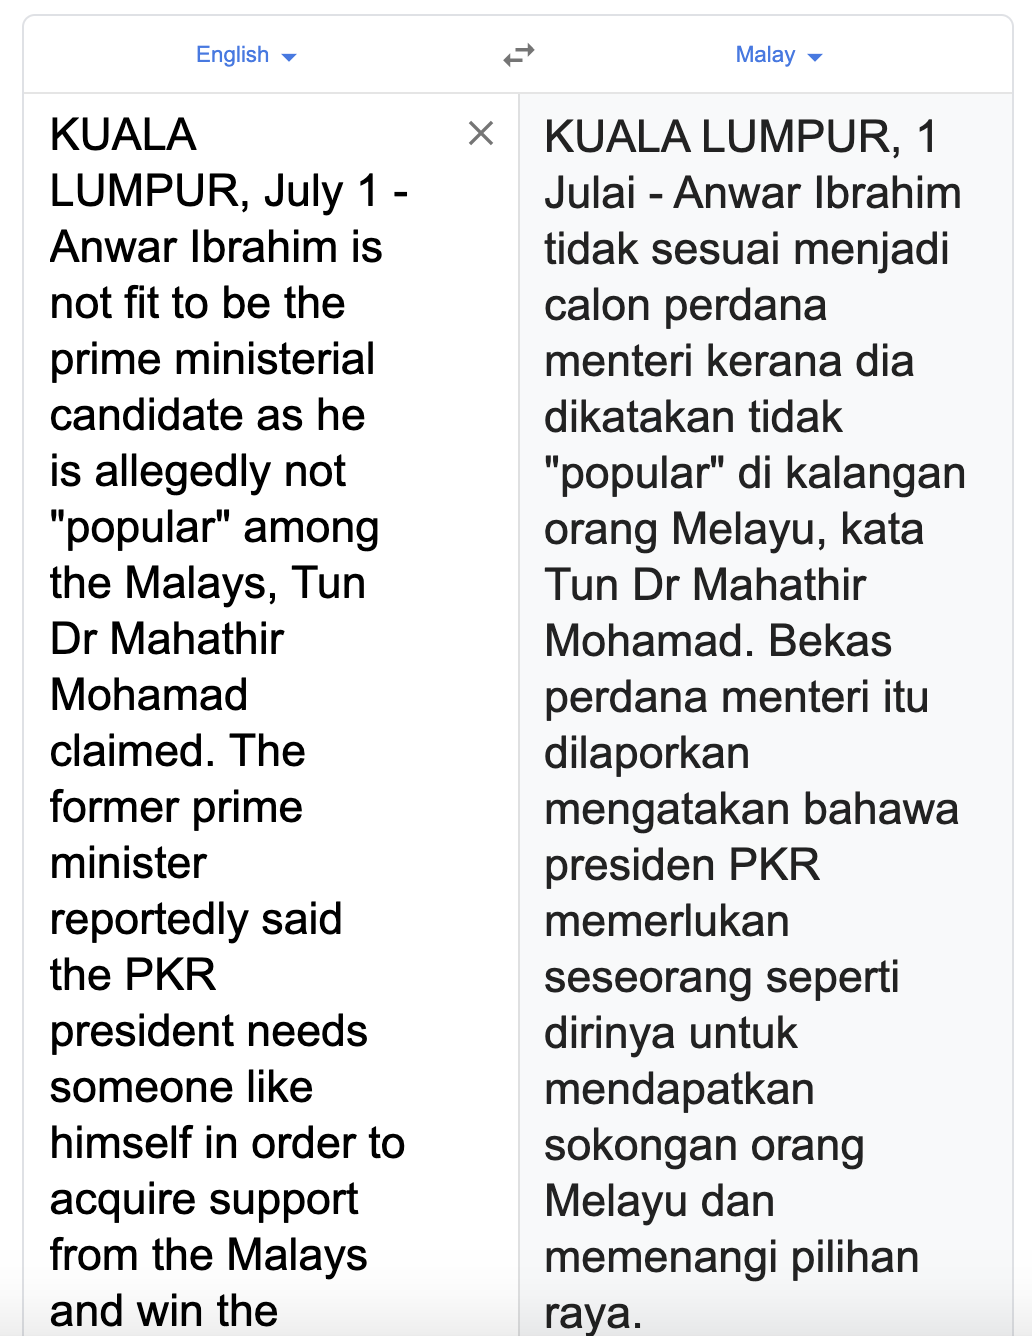

In [11]:
from IPython.core.display import Image, display

display(Image('en-string1.png', width=450))

KUALA LUMPUR, 1 Julai - Anwar Ibrahim tidak sesuai menjadi calon perdana menteri kerana dia dikatakan tidak "popular" di kalangan orang Melayu, kata Tun Dr Mahathir Mohamad. Bekas perdana menteri itu dilaporkan mengatakan bahawa presiden PKR memerlukan seseorang seperti dirinya untuk mendapatkan sokongan orang Melayu dan memenangi pilihan raya.

**string_news2**

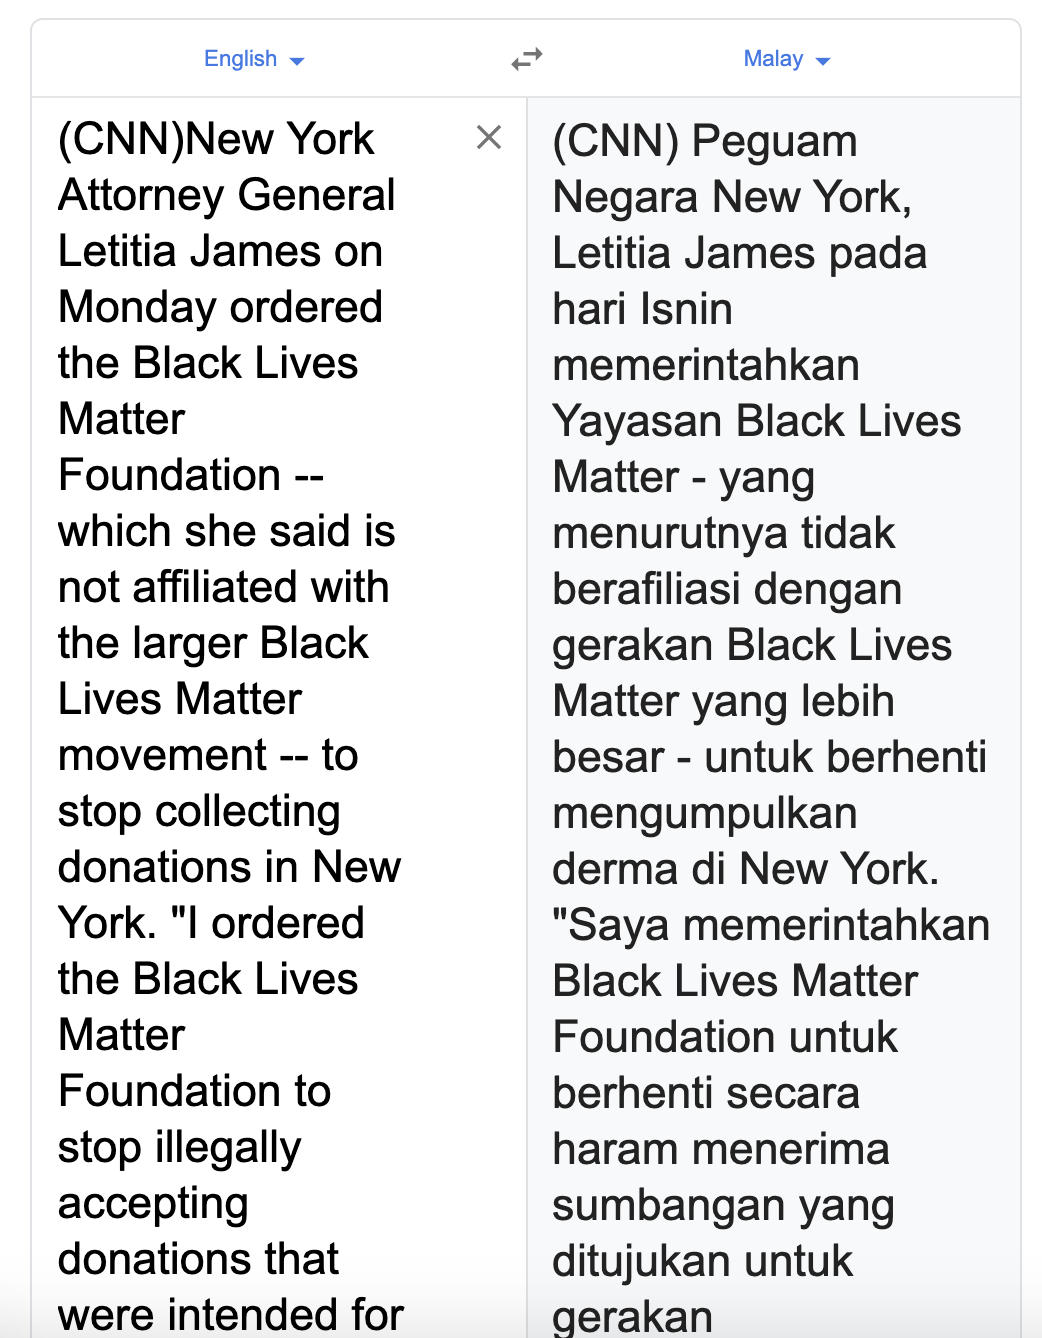

In [12]:
display(Image('en-string2.png', width=450))

(CNN) Peguam Negara New York, Letitia James pada hari Isnin memerintahkan Yayasan Black Lives Matter - yang menurutnya tidak berafiliasi dengan gerakan Black Lives Matter yang lebih besar - untuk berhenti mengumpulkan derma di New York. "Saya memerintahkan Black Lives Matter Foundation untuk berhenti secara haram menerima sumbangan yang ditujukan untuk gerakan #BlackLivesMatter. Yayasan ini tidak berafiliasi dengan gerakan itu, namun ia menerima banyak sumbangan dan menipu muhibah," tweet James.

**string_news3**

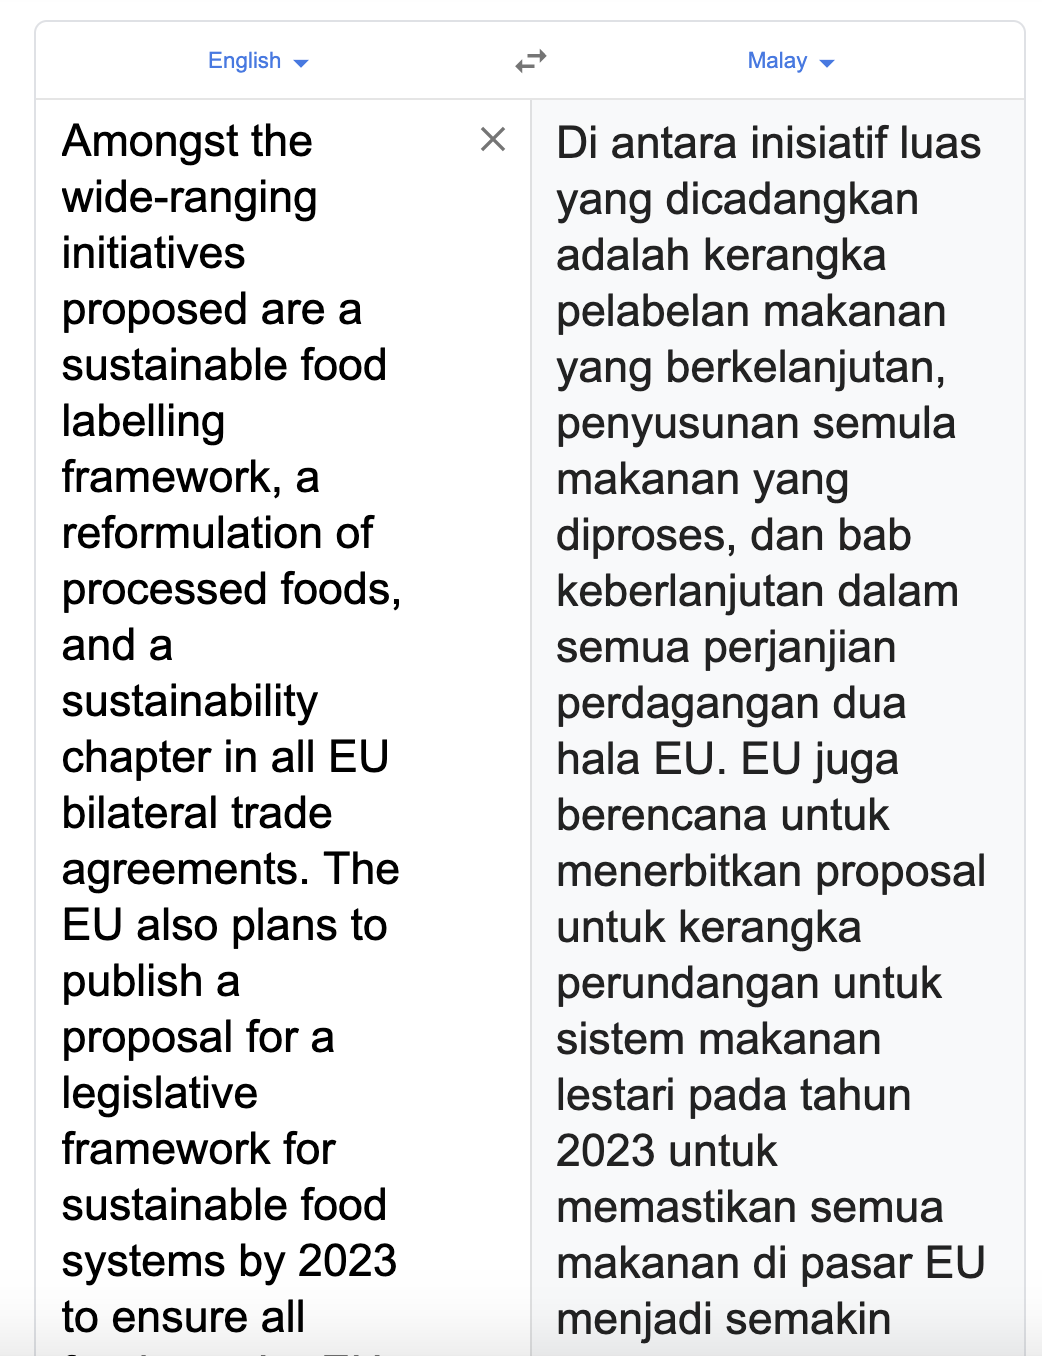

In [13]:
display(Image('en-string3.png', width=450))


Di antara inisiatif luas yang dicadangkan adalah kerangka pelabelan makanan yang berkelanjutan, penyusunan semula makanan yang diproses, dan bab keberlanjutan dalam semua perjanjian perdagangan dua hala EU. EU juga berencana untuk menerbitkan proposal untuk kerangka perundangan untuk sistem makanan lestari pada tahun 2023 untuk memastikan semua makanan di pasar EU menjadi semakin

**random_string2**

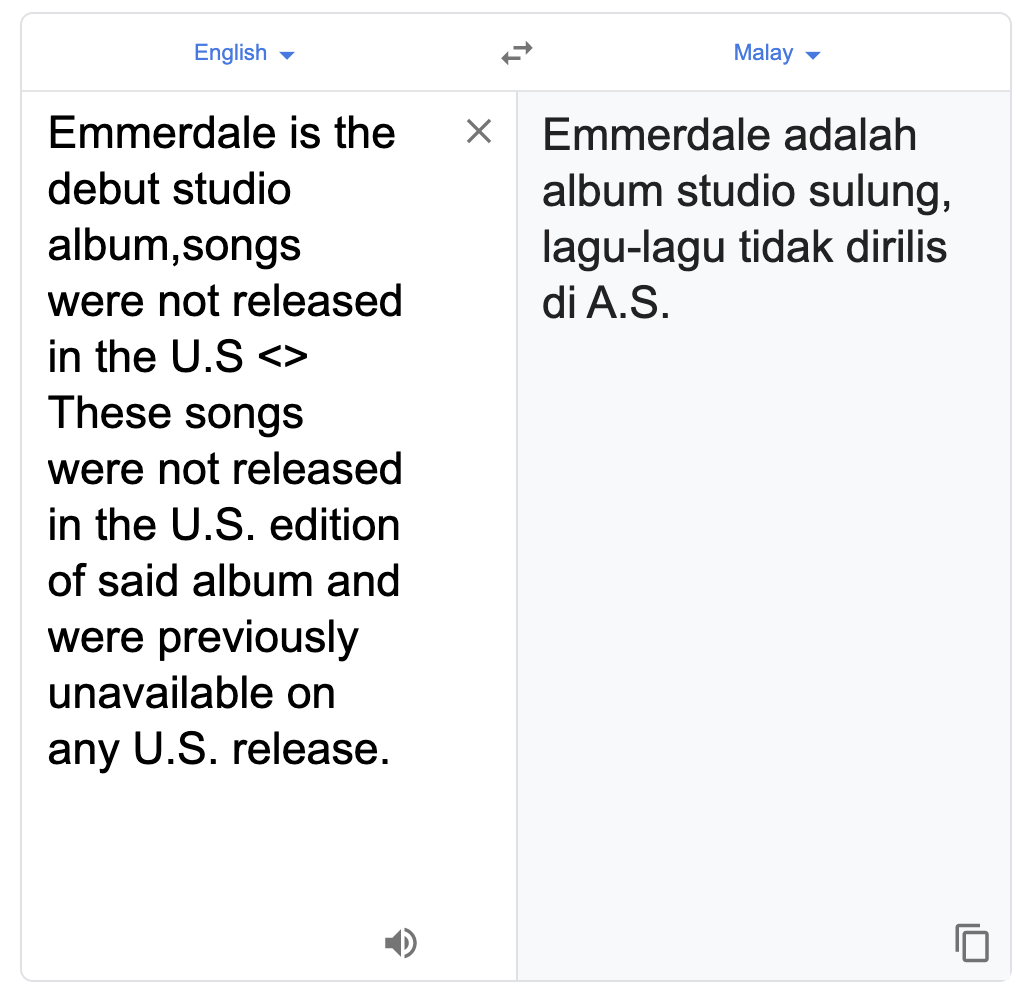

In [14]:
display(Image('en-string4.png', width=450))


Emmerdale adalah album studio sulung, lagu-lagu tidak dirilis di A.S.

#### Translate transformer base

In [12]:
%%time

pprint(transformer.greedy_decoder([string_news1, string_news2, string_news3]))

['KUALA LUMPUR 1 Julai - Datuk Seri Anwar Ibrahim tidak sesuai menjadi calon '
 'Perdana Menteri kerana beliau didakwa tidak "popular" dalam kalangan orang '
 'Melayu, Tun Dr Mahathir Mohamad mendakwa, bekas Perdana Menteri itu '
 'dilaporkan berkata Presiden PKR itu memerlukan seseorang seperti dirinya '
 'bagi mendapatkan sokongan daripada orang Melayu dan memenangi pilihan raya.',
 '(CNN) Peguam Negara New York Letitia James pada hari Isnin memerintahkan '
 'Black Lives Matter Foundation - yang menurutnya tidak berafiliasi dengan '
 'gerakan Black Lives Matter yang lebih besar - untuk berhenti mengumpulkan '
 'sumbangan di New York. "Saya memerintahkan Black Lives Matter Foundation '
 'untuk berhenti menerima sumbangan secara haram yang bertujuan untuk gerakan '
 '#BlackLivesMatter. Yayasan ini tidak berafiliasi dengan gerakan itu, namun '
 'ia menerima banyak sumbangan dan muhibah yang ditipu," tweet James.',
 'Di antara inisiatif luas yang diusulkan adalah kerangka pelabelan makan

In [13]:
%%time

pprint(transformer.greedy_decoder([string_article1, string_article2]))

['Halaman ini berkongsi artikel terbaik saya untuk dibaca mengenai topik '
 'seperti kesihatan, kebahagiaan, kreativiti, produktiviti dan banyak lagi. '
 'Soalan utama yang mendorong kerja saya adalah, "Bagaimana kita dapat hidup '
 'lebih baik?" Untuk menjawab soalan itu, saya suka menulis mengenai kaedah '
 'berasaskan sains untuk menyelesaikan masalah praktikal.',
 'Pemadanan kabur pada skala. Dari 3.7 jam hingga 0.2 saat. Cara melakukan '
 'pemadanan rentetan pintar dengan cara yang dapat meningkatkan bahkan set '
 'data terbesar. Data di dunia nyata tidak kemas. Berurusan dengan set data '
 'yang tidak kemas menyakitkan dan terbakar sepanjang masa yang dapat '
 'dihabiskan untuk menganalisis data itu sendiri.']
CPU times: user 15.9 s, sys: 9.21 s, total: 25.2 s
Wall time: 6.32 s


In [14]:
%%time

pprint(transformer.greedy_decoder([random_string1, random_string2]))

['saya di sekolah perubatan.',
 'Emmerdale adalah album studio debut, lagu-lagu tidak dikeluarkan di A.S <> '
 'Lagu-lagu ini tidak dikeluarkan dalam edisi A.S. album tersebut dan '
 'sebelumnya tidak tersedia pada sebarang pelepasan A.S.']
CPU times: user 9.98 s, sys: 5.52 s, total: 15.5 s
Wall time: 4.23 s


#### Translate transformer small

In [15]:
%%time

pprint(transformer_small.greedy_decoder([string_news1, string_news2, string_news3]))

['KUALA LUMPUR 1 Julai - Datuk Seri Anwar Ibrahim tidak sesuai kerana calon '
 'perdana menteri kerana didakwa tidak "popular" dalam kalangan orang Melayu, '
 'Tun Dr Mahathir Mohamad mendakwa. Bekas perdana menteri itu dilaporkan '
 'berkata, presiden PKR itu memerlukan seseorang seperti dirinya sendiri untuk '
 'memperoleh sokongan daripada orang Melayu dan memenangi pilihan raya.hari '
 'ini, Datuk Seri Anwar Ibrahim tidak sesuai untuk menjadi calon',
 '(CNN) Peguam Negara New York Letitia James pada hari Isnin memerintahkan '
 'Yayasan Black Lives Matter - yang menurutnya tidak berafiliasi dengan '
 'gerakan Black Lives Matter yang lebih besar - untuk berhenti mengumpulkan '
 'sumbangan di New York. "Saya memerintahkan Yayasan Black Lives Matter untuk '
 'berhenti menerima sumbangan secara haram yang bertujuan untuk gerakan '
 '#BlackLivesMatter. Yayasan ini tidak berafiliasi dengan gerakan itu, namun '
 'ia menerima banyak sumbangan dan muhibah yang menipu," tweet James.',
 'Among

In [16]:
%%time

pprint(transformer_small.greedy_decoder([string_article1, string_article2]))

['Halaman ini berkongsi artikel terbaik saya untuk membaca topik seperti '
 'kesihatan, kebahagiaan, kreativiti, produktiviti dan banyak lagi. Soalan '
 'pusat yang mendorong karya saya adalah, "Bagaimana kita dapat hidup lebih '
 'baik?" Untuk menjawab soalan itu, saya suka menulis mengenai cara berasaskan '
 'sains untuk menyelesaikan masalah praktikal.',
 'Pemadanan Fuzzy pada skala. Dari 3.7 jam hingga 0.2 saat. Cara melakukan '
 'pemadanan rentetan pintar dengan cara yang dapat meningkatkan set data '
 'terbesar bahkan. Data di dunia nyata tidak kemas. Berurusan dengan set data '
 'yang tidak kemas menyakitkan dan terbakar melalui masa yang dapat dihabiskan '
 'untuk menganalisis data itu sendiri.']
CPU times: user 2.45 s, sys: 384 ms, total: 2.84 s
Wall time: 738 ms


In [17]:
%%time

pprint(transformer_small.greedy_decoder([random_string1, random_string2]))

['saya berada di sekolah perubatan.',
 'Emmerdale adalah album studio sulung, lagu-lagu tidak dikeluarkan di A.S <> '
 'Lagu-lagu ini tidak dikeluarkan di edisi A.S. yang dikatakan album dan '
 'sebelumnya tidak tersedia di mana-mana pelepasan A.S.']
CPU times: user 1.7 s, sys: 291 ms, total: 1.99 s
Wall time: 535 ms


#### Translate transformer large

In [18]:
%%time

pprint(transformer_large.greedy_decoder([string_news1, string_news2, string_news3]))

['KUALA LUMPUR 1 Julai - Datuk Seri Anwar Ibrahim tidak sesuai menjadi calon '
 'Perdana Menteri kerana beliau didakwa tidak "popular" dalam kalangan orang '
 'Melayu, kata Tun Dr Mahathir Mohamad. Bekas Perdana Menteri itu dilaporkan '
 'berkata, Presiden PKR memerlukan seseorang seperti dirinya bagi mendapatkan '
 'sokongan daripada orang Melayu dan memenangi pilihan raya.',
 '(CNN) Peguam Negara New York Letitia James pada hari Isnin memerintahkan '
 'Black Lives Matter Foundation - yang menurutnya tidak berafiliasi dengan '
 'gerakan Black Lives Matter yang lebih besar - untuk berhenti mengumpulkan '
 'sumbangan di New York. "Saya memerintahkan Black Lives Matter Foundation '
 'untuk berhenti menerima sumbangan secara haram yang bertujuan untuk gerakan '
 '#BlackLivesMatter. Yayasan ini tidak berafiliasi dengan gerakan itu, namun '
 'ia menerima banyak sumbangan dan muhibah yang ditipu," tweet James.',
 'Di antara inisiatif luas yang diusulkan adalah kerangka pelabelan makanan '
 '

In [19]:
%%time

pprint(transformer_large.greedy_decoder([string_article1, string_article2]))

['Halaman ini berkongsi artikel terbaik saya untuk membaca topik seperti '
 'kesihatan, kebahagiaan, kreativiti, produktiviti dan banyak lagi. Soalan '
 'utama yang mendorong karya saya adalah, "Bagaimana kita dapat hidup lebih '
 'baik?" Untuk menjawab soalan itu, saya suka menulis mengenai kaedah '
 'berasaskan sains untuk menyelesaikan masalah praktikal.',
 'Pemadanan kabur pada skala. Dari 3.7 jam hingga 0.2 saat. Cara melakukan '
 'pemadanan rentetan pintar dengan cara yang dapat meningkatkan skala ke set '
 'data terbesar. Data di dunia nyata tidak kemas. Berurusan dengan set data '
 'yang tidak kemas menyakitkan dan terbakar sepanjang masa yang dapat '
 'dihabiskan untuk menganalisis data itu sendiri.']
CPU times: user 48.9 s, sys: 19.5 s, total: 1min 8s
Wall time: 12.5 s


In [20]:
%%time

pprint(transformer_large.greedy_decoder([random_string1, random_string2]))

['saya di sekolah perubatan.',
 'Emmerdale adalah album studio debut, lagu-lagu tidak dikeluarkan di AS <> '
 'Lagu-lagu ini tidak dikeluarkan dalam edisi A.S. album tersebut dan '
 'sebelumnya tidak tersedia untuk sebarang pelepasan A.S.']
CPU times: user 29.9 s, sys: 12.3 s, total: 42.2 s
Wall time: 7.36 s
